In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [18]:
train
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [19]:
x_train = train.drop('label', axis=1).values
x_test = test.drop('label', axis=1).values

In [20]:
y_train = train['label'].values
y_test = test['label'].values

In [21]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')/255
x_test = x_test.reshape(10000,32,32,3).astype('float32')/255
# x_test = x_test.astype('float32')/255
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

In [22]:
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

In [23]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_ctegorical(y_test, 2)

In [24]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')  # Assuming there are 20 classes
])


C:\Users\Vedant Gadekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [26]:
history = model.fit(x_train, y_train, epochs=5, batch_size=50,  validation_data=(x_test, y_test))


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2427 - loss: 2.1222 - val_accuracy: 0.3534 - val_loss: 1.8112
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3563 - loss: 1.8060 - val_accuracy: 0.3835 - val_loss: 1.7315
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3914 - loss: 1.7178 - val_accuracy: 0.4141 - val_loss: 1.6560
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4169 - loss: 1.6507 - val_accuracy: 0.4192 - val_loss: 1.6376
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4327 - loss: 1.6083 - val_accuracy: 0.4284 - val_loss: 1.6060


In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4358 - loss: 1.5974


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
predicted value:  8


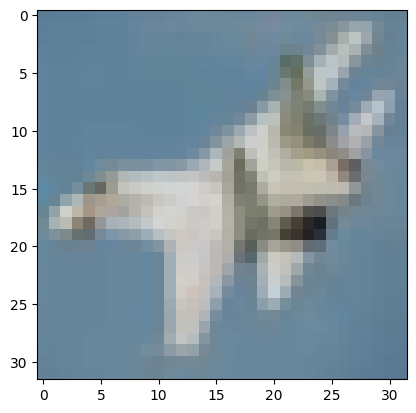

In [28]:
n=10
predicted_values = model.predict(x_test)
plt.imshow(x_test[n])
# plt.show()
print("predicted value: ", np.argmax(predicted_values[n],axis=0))

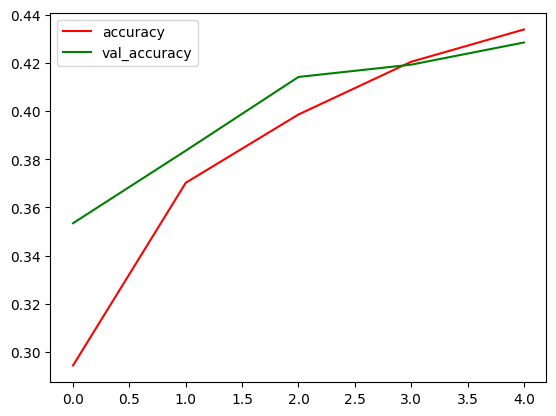

In [29]:
plt.plot(history.history['accuracy'], label='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='green')
plt.legend()